features: tensor([-0.3873,  1.7883]) 
label: tensor([-2.6713])


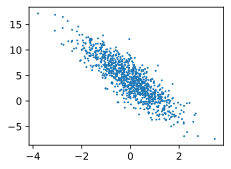

epoch 1, loss 9.095054
epoch 2, loss 4.977910
epoch 3, loss 2.724857
epoch 4, loss 1.491790
epoch 5, loss 0.816824
epoch 6, loss 0.447312
epoch 7, loss 0.245001
epoch 8, loss 0.134218
epoch 9, loss 0.073545
epoch 10, loss 0.040316
epoch 11, loss 0.022113
epoch 12, loss 0.012141
epoch 13, loss 0.006677
epoch 14, loss 0.003684
epoch 15, loss 0.002042
epoch 16, loss 0.001143
epoch 17, loss 0.000649
epoch 18, loss 0.000379
epoch 19, loss 0.000231
epoch 20, loss 0.000149


In [1]:
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):
    """生成 y=Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w))) # 生成均值为零,方差为一的随机数,n个样本,列的长度是w的长度.
    y = torch.matmul(X, w) + b # torch的乘法,矩阵×向量是一个列向量
    y += torch.normal(0, 0.01, y.shape) # 这里是噪音
    return X, y.reshape((-1, 1))  # 给-1就会自动计算-1位置的值

true_w = torch.tensor([2, -3.4])
ture_b = 4.2
features, labels = synthetic_data(true_w, ture_b, 1000)

print('features:', features[0], '\nlabel:', labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)
d2l.plt.show()

### ----------------------------------------------------
### 给一些样本标号,我随机从里面取batch_size大小的样本出来
def data_iter(batch_size, features, labels):  #批量大小,特征,标签
    num_examples = len(features)
    indices = list(range(num_examples)) # 生成样本的标号

    # 样本随机读取
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indics = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        # print(batch_indics)
        yield features[batch_indics], labels[batch_indics]

batch_size = 10

# for X, y in data_iter(batch_size, features, labels):
#     print(X, '\n', y)
#     break

### 定义初始化模型参数
w = torch.normal(0, 0.01, size = (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 定义模型
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

### 定义损失函数
def squared_loss(y_hat, y):
    """均方误差"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法
def sgd(params, lr, batch_size):  #lr 学习率
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 训练
lr = 0.003
num_epochs = 20 # 把整个数据扫三遍
net = linreg   # 模型
loss = squared_loss # 损失

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)  

    
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


In [5]:
# 读数据
from torch.utils import data
import torch
from d2l import torch as d2l
import numpy as np

true_w = torch.tensor([2, -3.4])
ture_b = 4.2
features, labels = d2l.synthetic_data(true_w, ture_b, 1000)

def load_array(data_arrays, batch_size, is_train = True):
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle = is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))


# 使用框架的预定义好的层
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

# 均方误差
loss = nn.MSELoss()

# SGD实例
trainer = torch.optim.SGD(net.parameters(), lr = 0.03)

# 训练模块
num_peochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')


epoch 1, loss 0.000217
epoch 2, loss 0.000097
epoch 3, loss 0.000099
epoch 4, loss 0.000097
epoch 5, loss 0.000097
epoch 6, loss 0.000097
epoch 7, loss 0.000098
epoch 8, loss 0.000099
epoch 9, loss 0.000097
epoch 10, loss 0.000098
epoch 11, loss 0.000097
epoch 12, loss 0.000099
epoch 13, loss 0.000098
epoch 14, loss 0.000098
epoch 15, loss 0.000098
epoch 16, loss 0.000098
epoch 17, loss 0.000098
epoch 18, loss 0.000098
epoch 19, loss 0.000098
epoch 20, loss 0.000097
